In [3]:
import FinanceDataReader as fdr
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import matplotlib as mpl
mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus=False)

In [4]:
corp_name ='큐렉소'
corp_code = '060280'  

import importlib
import my_module
importlib.reload(my_module)

my_module.get_dart_finance(corp_code, corp_name) # 재무제표를 가져오기 위해서 활성화 시켜야 함

폴더의 위치는D:\python_PJT\01_Data_Mart_생성\05_종목별_Data\큐렉소 입니다.
reprt_code='11013', fs_div='CFS' (1분기보고서, 연결제무제표)'
{'status': '013', 'message': '조회된 데이타가 없습니다.'}

reprt_code='11012', fs_div='CFS' (반기보고서, 연결제무제표)'
{'status': '013', 'message': '조회된 데이타가 없습니다.'}

reprt_code='11014', fs_div='CFS' (3분기보고서, 연결제무제표)'
{'status': '013', 'message': '조회된 데이타가 없습니다.'}

reprt_code='11011', fs_div='CFS' (사업보고서, 연결제무제표)'
reprt_code='11013', fs_div='CFS' (1분기보고서, 연결제무제표)'
reprt_code='11012', fs_div='CFS' (반기보고서, 연결제무제표)'
reprt_code='11014', fs_div='CFS' (3분기보고서, 연결제무제표)'
reprt_code='11011', fs_div='CFS' (사업보고서, 연결제무제표)'
{'status': '013', 'message': '조회된 데이타가 없습니다.'}

reprt_code='11013', fs_div='CFS' (1분기보고서, 연결제무제표)'
{'status': '013', 'message': '조회된 데이타가 없습니다.'}

reprt_code='11012', fs_div='CFS' (반기보고서, 연결제무제표)'
{'status': '013', 'message': '조회된 데이타가 없습니다.'}

reprt_code='11014', fs_div='CFS' (3분기보고서, 연결제무제표)'
{'status': '013', 'message': '조회된 데이타가 없습니다.'}

reprt_code='11011', fs_div='CFS' (사업보고서, 연결제무제표)'


In [5]:
path =r"D:\python_PJT\01_Data_Mart_생성\05_종목별_Data"

In [6]:
#코스피, 주가 가져오기
df_kospi = fdr.DataReader('KS11', start='2015-01-02') # KOSPI 지수
df_price = fdr.DataReader(corp_code, start='2015-01-02') 

In [7]:
# 누적수익률 구하기
df_price['누적수익률'] = df_price['Close']/df_price['Close'].iloc[0]

Text(0, 0.5, '누적수익(배수)')

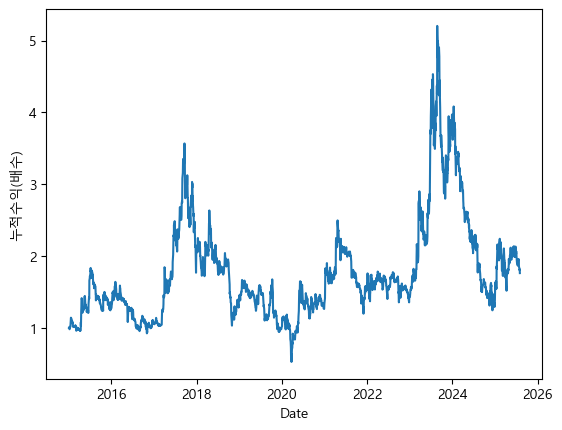

In [8]:
sns.lineplot(df_price, x=df_price.index, y='누적수익률')
plt.ylabel('누적수익(배수)')

In [9]:
#MDD 그래프화하기(250일 기준)
def MDD_chart(df_m):
    df_m['MDD']=((
        df_m['Close']-df_m['Close'].rolling(min_periods=1, window=250).max())/
        df_m['Close'].rolling(min_periods=1, window=250).max()*100
        )

    sns.lineplot(df_m, x=df_m.index, y='MDD')

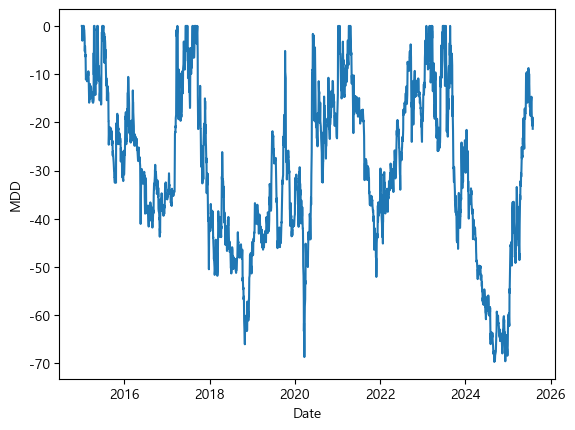

In [10]:
MDD_chart(df_price)

In [11]:
#df_price에 맞춰서 인덱스 조절하고 빈칸은 interpolate로 채우는 사용자 함수
def index_daily_adjusted(df_i):
    new_index = pd.date_range(start=df_price.index[0], end=df_price.index[-1],freq='D')
    df_daily=df_i.reindex(new_index)
    df_daily_interpolate = df_daily.interpolate(method='linear')
    df_daily_interpolate.fillna(method='bfill', inplace=True)
    # sns.heatmap(df_daily_interpolate.isna())
    return df_daily_interpolate

In [12]:
df_price = index_daily_adjusted(df_price)

In [13]:
import os
import re

folder_path = os.path.join(path, corp_name)
file_list=os.listdir(folder_path)
filtered_list = [os.path.join(folder_path, name) for name in file_list if re.search(r'손익계산서|재무상태표|현금흐름표', name)]
filtered_list =sorted(filtered_list)
filtered_list

['D:\\python_PJT\\01_Data_Mart_생성\\05_종목별_Data\\큐렉소\\큐렉소_손익계산서.xlsx',
 'D:\\python_PJT\\01_Data_Mart_생성\\05_종목별_Data\\큐렉소\\큐렉소_재무상태표.xlsx',
 'D:\\python_PJT\\01_Data_Mart_생성\\05_종목별_Data\\큐렉소\\큐렉소_현금흐름표.xlsx']

In [14]:
file_list

['큐렉소_손익계산서.xlsx', '큐렉소_재무상태표.xlsx', '큐렉소_현금흐름표.xlsx']

In [15]:
#손익계산서 불러오기
df_ic = pd.read_excel(filtered_list[0], parse_dates=True)
df_ic.index=df_ic['issue_date']
df_ic.drop(columns=['issue_date'], inplace=True)

In [16]:
#재무상태표 불러오기
df_bs = pd.read_excel(filtered_list[1], parse_dates=True)
df_bs.index=df_bs['issue_date']
df_bs.drop(columns=['issue_date'], inplace=True)

In [17]:
#현금흐름표 불러오기
df_cf = pd.read_excel(filtered_list[2], parse_dates=True)
df_cf.index=df_cf['issue_date']
df_cf.drop(columns=['issue_date'], inplace=True)

In [18]:
#사용자함수를 이용해 불러온 df의 daily index 맞추기
df_ic_daily = index_daily_adjusted(df_ic)
df_bs_daily = index_daily_adjusted(df_bs)
df_cf_daily = index_daily_adjusted(df_cf)

In [19]:
# 재무제표 df_price에 합쳐서 -df_merged 만들기, 계약금액, 누적수익률은 분석을 위해 제거하기
data_list=[df_price, df_ic_daily, df_bs_daily, df_cf_daily] #df_investor_daily
df_merged=pd.concat(data_list, axis=1)

df_merged.drop(columns=['Open','High','Low'], inplace=True) #'계약금액','누적수익률',

In [20]:
# 15년도 데이터는 bfill로 채운데이터로 적합하지 못해 16년 부터 데이터로 채택
start_date=pd.to_datetime('2016-01-02')
end_date = df_merged.index[-1]
df_merged = df_merged.loc[start_date:end_date, :]

In [21]:

df_merged.to_excel(f'{folder_path}\\{corp_name}_데이터머지.xlsx')

<Axes: >

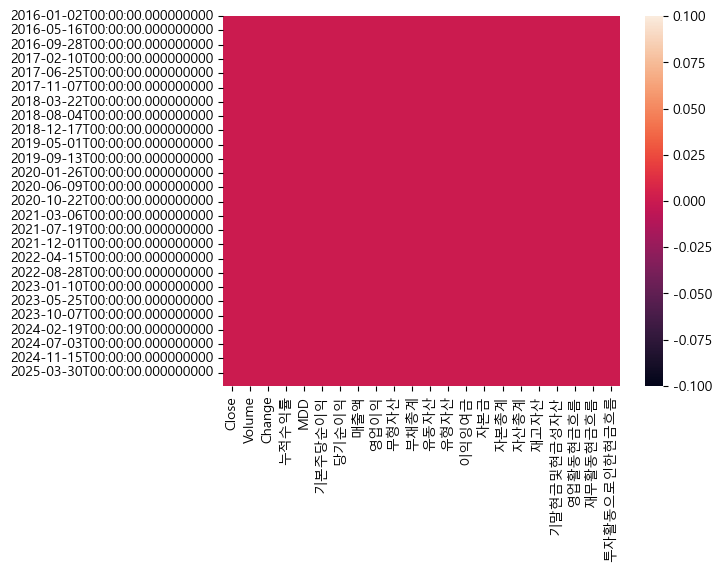

In [22]:
sns.heatmap(df_merged.isna())

In [23]:
#데이터머지 파일을 불러서 분석 진행 

In [24]:
import os
import re

file_list=os.listdir(folder_path)
filtered = [ os.path.join(folder_path, name) for name in file_list if re.search('데이터머지', name)]
filtered

['D:\\python_PJT\\01_Data_Mart_생성\\05_종목별_Data\\큐렉소\\큐렉소_데이터머지.xlsx']

In [25]:
df = pd.read_excel(filtered[0], parse_dates=True)
df.rename(columns={'Unnamed: 0':'일자'}, inplace=True)
df.index = df['일자']
df.drop(columns=['일자'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3500 entries, 2016-01-02 to 2025-08-01
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Close         3500 non-null   float64
 1   Volume        3500 non-null   float64
 2   Change        3500 non-null   float64
 3   누적수익률         3500 non-null   float64
 4   MDD           3500 non-null   float64
 5   기본주당순이익       3500 non-null   float64
 6   당기순이익         3500 non-null   float64
 7   매출액           3500 non-null   float64
 8   영업이익          3500 non-null   float64
 9   무형자산          3500 non-null   float64
 10  부채총계          3500 non-null   float64
 11  유동자산          3500 non-null   float64
 12  유형자산          3500 non-null   float64
 13  이익잉여금         3500 non-null   float64
 14  자본금           3500 non-null   float64
 15  자본총계          3500 non-null   float64
 16  자산총계          3500 non-null   float64
 17  재고자산          3500 non-null   float64
 18  기말현금및현금성자산

In [26]:
valid_counts = df.count()
drop_cols = valid_counts[valid_counts <= 100].index
df = df.drop(columns=drop_cols)
print("삭제된 컬럼:", list(drop_cols))

삭제된 컬럼: []


In [27]:
data_path =r"D:\python_PJT\케이스연구\Data"

import math
def draw_all_chart(df):
    n_variable = int(len(df.columns))
    width = 3
    length = math.ceil(n_variable/width)

    fig, ax = plt.subplots(length, width, figsize=(6*width, 5*length))
    fig.suptitle(f'{corp_name} 재무제표 지표', fontsize=20, y=0.92)
    ax = ax.flatten()

    for i, name in enumerate(df.columns):
        # print(f"Plotting column: {name}")
        sns.lineplot(data=df, x=df.index, y=name, ax=ax[i], label=name)

    fig.savefig(f"{data_path}\{corp_name}_재무제표 지표.png", dpi=300, bbox_inches='tight')

In [28]:
df.columns

Index(['Close', 'Volume', 'Change', '누적수익률', 'MDD', '기본주당순이익', '당기순이익', '매출액',
       '영업이익', '무형자산', '부채총계', '유동자산', '유형자산', '이익잉여금', '자본금', '자본총계', '자산총계',
       '재고자산', '기말현금및현금성자산', '영업활동현금흐름', '재무활동현금흐름', '투자활동으로인한현금흐름'],
      dtype='object')

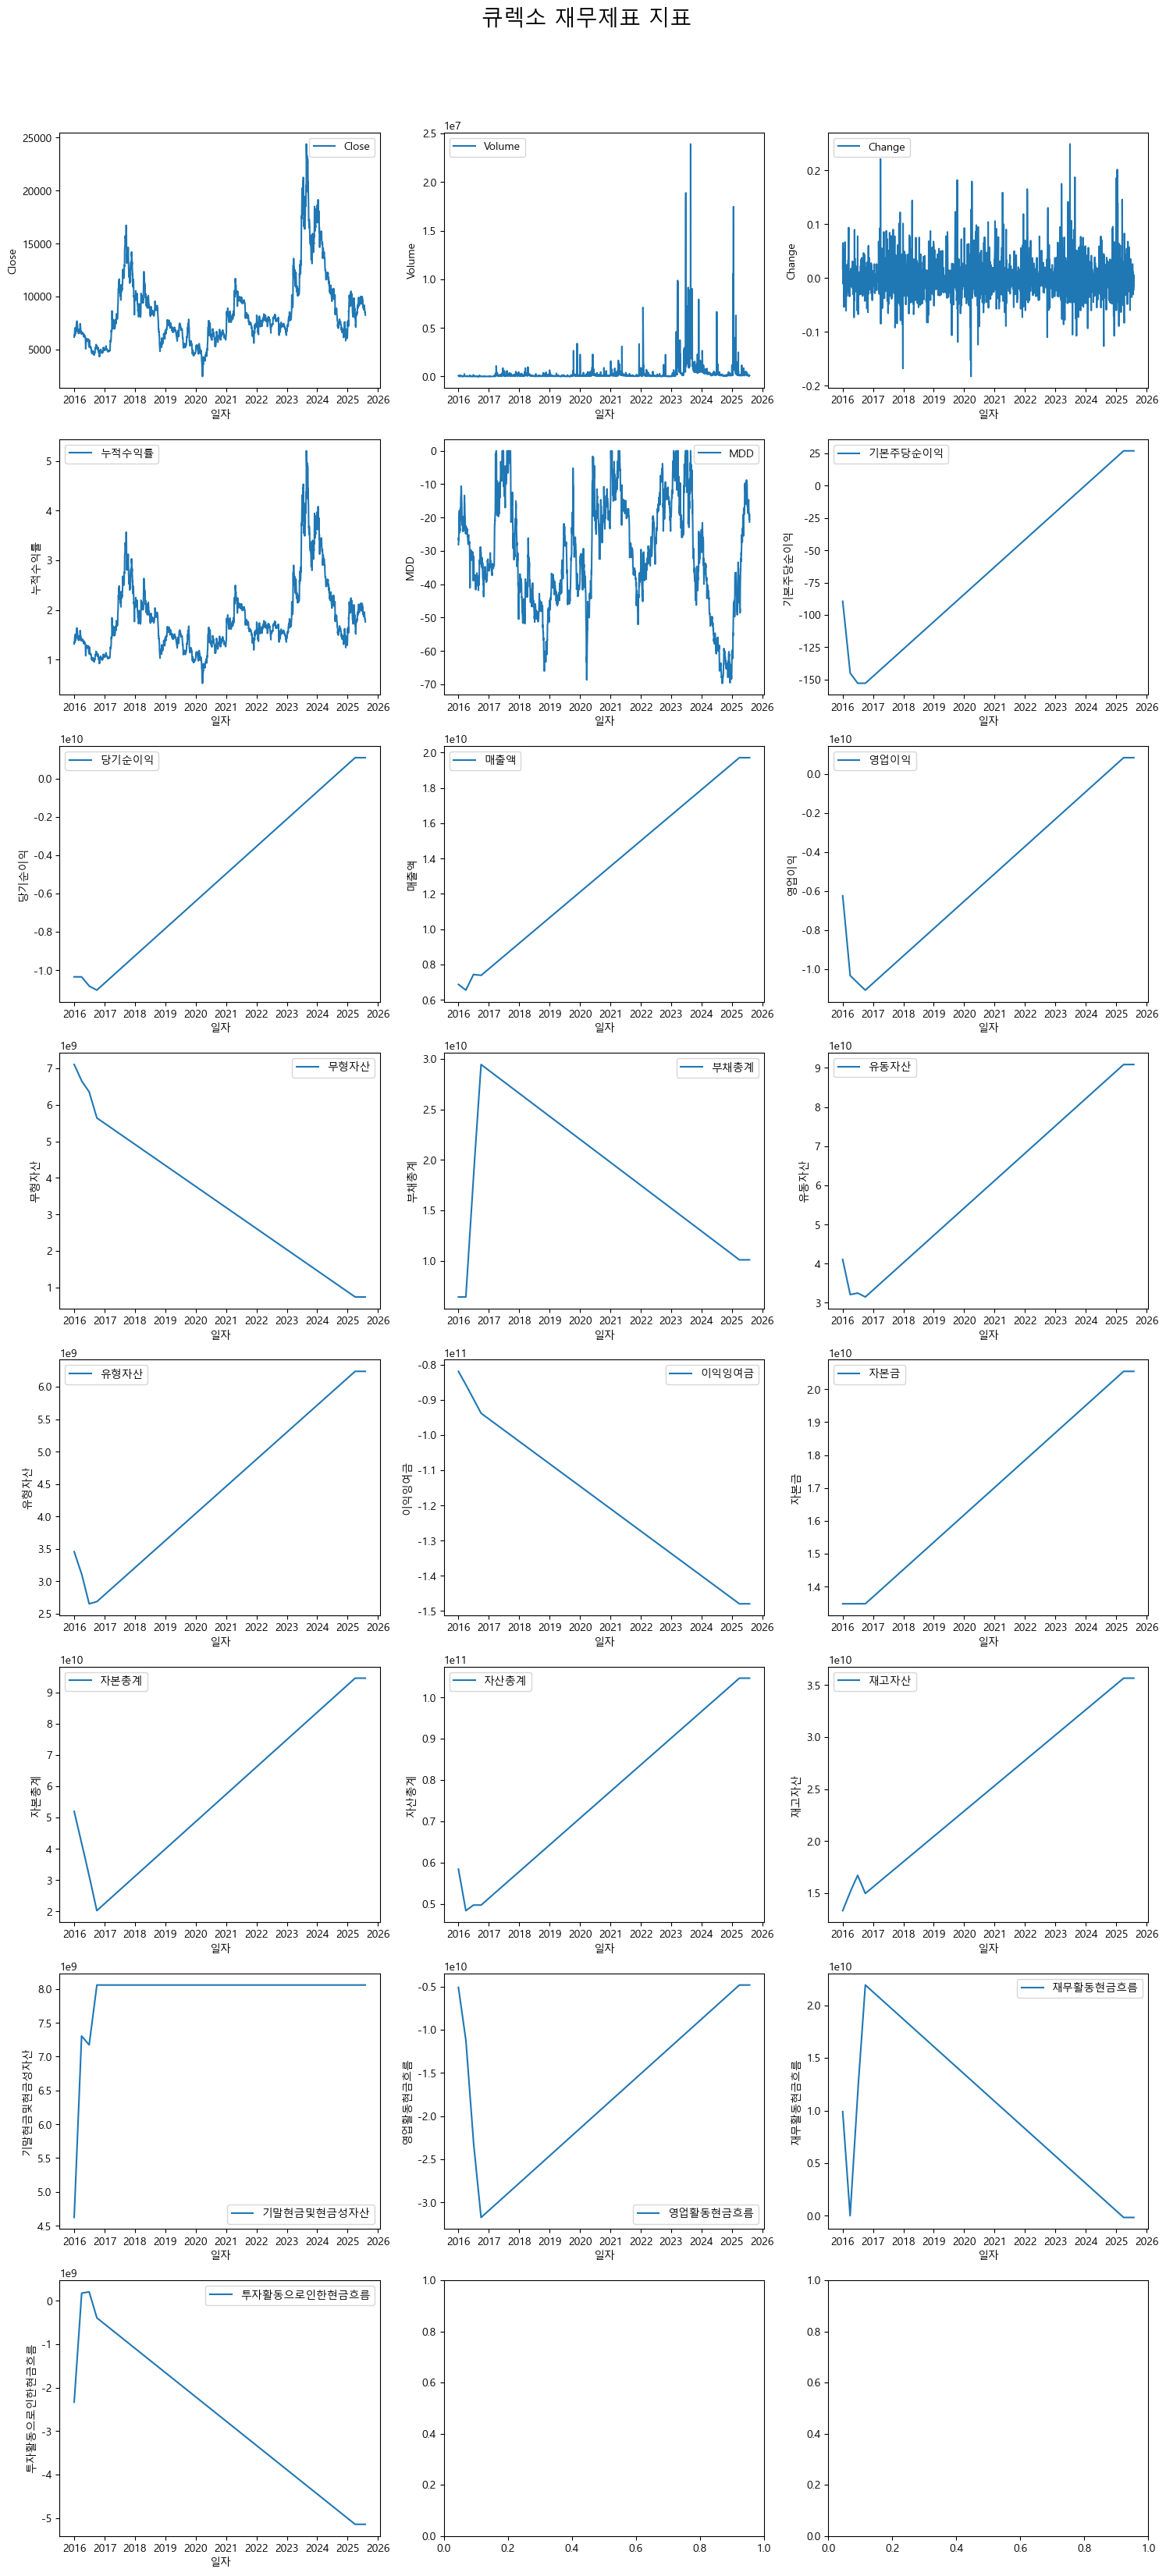

In [29]:
draw_all_chart(df)

In [30]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit_transform(df)
df_sc=pd.DataFrame(sc, index=df.index, columns=df.columns)


In [31]:
df_sc.drop(columns=['누적수익률'], inplace=True)

In [32]:
df_sc.columns

Index(['Close', 'Volume', 'Change', 'MDD', '기본주당순이익', '당기순이익', '매출액', '영업이익',
       '무형자산', '부채총계', '유동자산', '유형자산', '이익잉여금', '자본금', '자본총계', '자산총계', '재고자산',
       '기말현금및현금성자산', '영업활동현금흐름', '재무활동현금흐름', '투자활동으로인한현금흐름'],
      dtype='object')

In [33]:
import numpy as np

selected_items=[col for col in df_sc.columns 
 if abs(df_sc['Close'].corr(df_sc[col])) > 0.4 and col != 'Close']
selected_items.append('Close')
df_sc=df_sc[selected_items]
np.array(selected_items)

array(['Volume', 'Close'], dtype='<U6')

In [34]:
df_sc.corr()[['Close']]

,Close
Volume,0.433852
Close,1.000000


In [35]:
leading_indicator =[]
for j in range(len(selected_items)):
    corr_list=[]
    idx = []
    for i in range(-360, 360, 5):
        corr=df_sc['Close'].shift(i).corr(df_sc[selected_items[j]])
        corr_list.append(corr)
        idx.append(i)
    corr_df = pd.DataFrame({'상관계수':corr_list}, index=idx)
    leading_date=corr_df['상관계수'].idxmax()  # + 이면 지표가 가격에 선행
    leading_indicator.append(leading_date)
results=pd.DataFrame({'선행일수':leading_indicator}, index=selected_items)

In [36]:
results

,선행일수
Volume,-5
Close,0


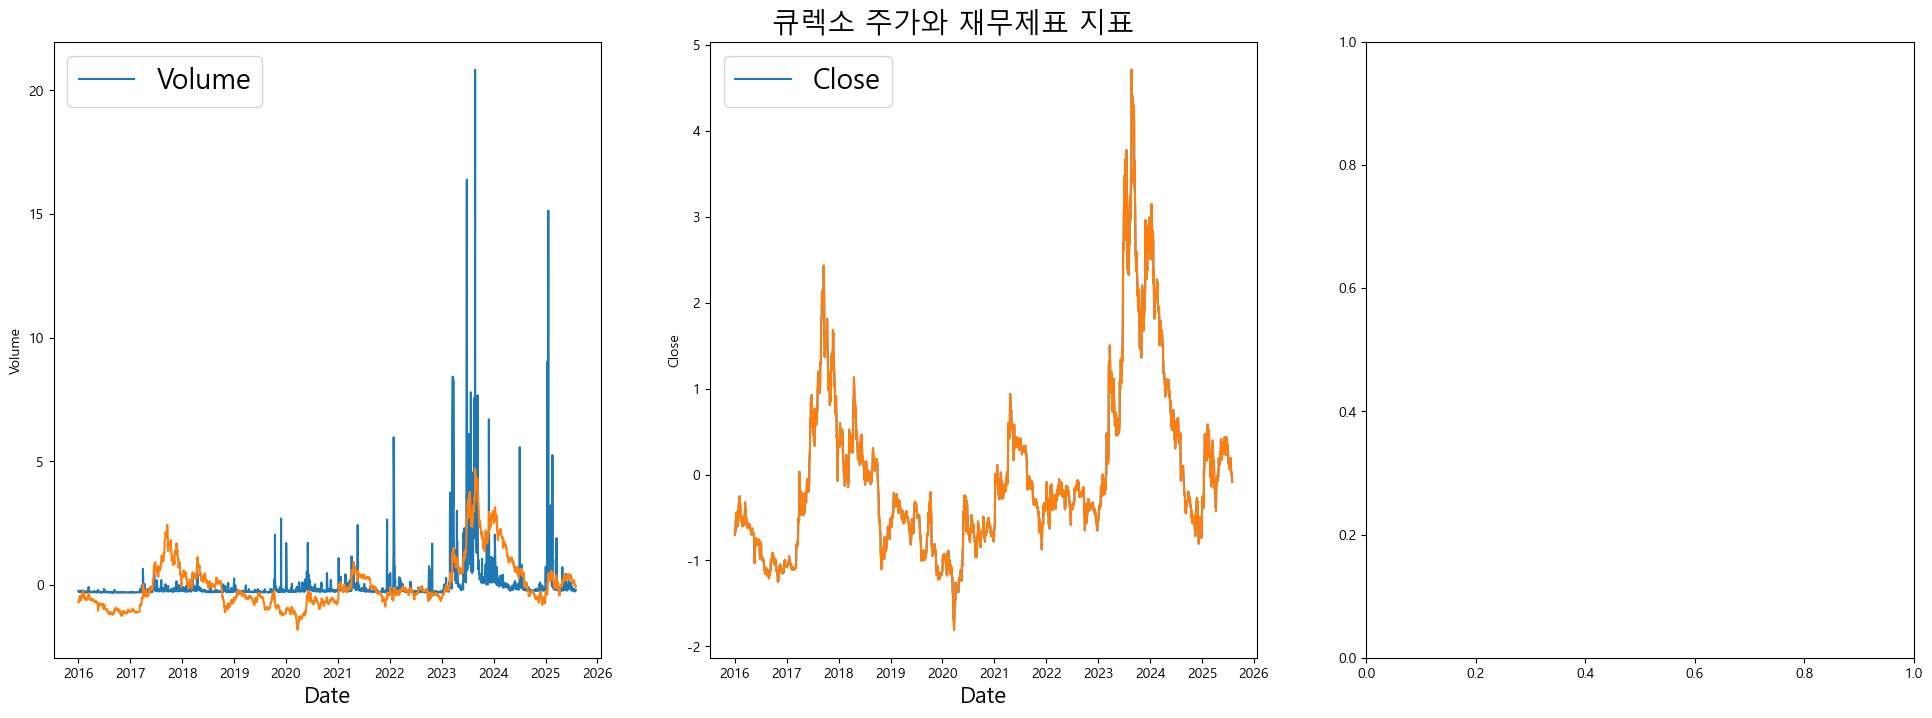

In [37]:
width=3
length = math.ceil(len(selected_items)/width)
fig, ax = plt.subplots(length,width, figsize=(8*width,8*length))
ax =ax.flatten()
fig.suptitle(f'{corp_name} 주가와 재무제표 지표', fontsize=20, y=0.92)

for i in range(len(selected_items)):
    sns.lineplot(df_sc, x=df_sc.index, y=selected_items[i], ax=ax[i], label=selected_items[i])
    sns.lineplot(df_sc, x=df_sc.index, y='Close', ax=ax[i])
    ax[i].legend(fontsize=20)
    ax[i].set_xlabel("Date", fontsize=16)

for j in range(i+1, len(selected_items)):
    ax[i].axis('off')

fig.savefig(f"{data_path}\{corp_name}_관련성 분석.png", dpi=300, bbox_inches='tight')